loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


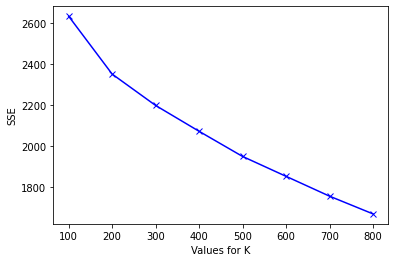

In [10]:
import  numpy as np
from sklearn.cluster import KMeans
from preclustering import PreClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
sse={}
X,df = PreClustering.main()

for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=800).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

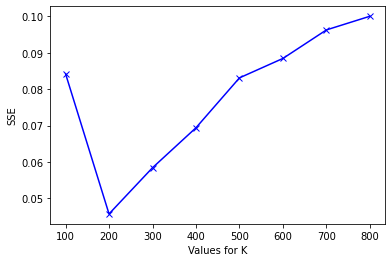

In [11]:
sse = {}

for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=800).fit(X)
    sse[k] = silhouette_score(X, kmeans.labels_)

plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [17]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)

kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([df,pd.DataFrame(X.toarray(),columns=vectoriser.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/home/annabelle/Documents/Advanced_Machine_Learning_Project/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
result[['text', 'cluster']]

,text,cluster
0,serious consid not going. good thing i have no...,125
1,i have a crave for a mrs crimbl coconut macaro...,145
2,rip k swift the good die young all da time dat...,13
3,itun upgrad ask licens agreement after the ins...,24
4,i'm tri to make lemon gelati but it wont set p...,32
...,...,...
4995,happi birthday noah! one year went by so fast,100
4996,usr good morn there,66
4997,wire mag need to serious chill out. i just ren...,187
4998,"some how i win a bunch of giveaways, i just re...",66


In [19]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='text' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [15]:
result_labelled[['text', 'cluster', 'label']]

,text,cluster,label
0,serious consid not going. good thing i have no...,12,
1,i have a crave for a mrs crimbl coconut macaro...,2,are
2,rip k swift the good die young all da time dat...,12,
3,itun upgrad ask licens agreement after the ins...,1,to
4,i'm tri to make lemon gelati but it wont set p...,11,make
...,...,...,...
4995,happi birthday noah! one year went by so fast,12,
4996,usr good morn there,12,
4997,wire mag need to serious chill out. i just ren...,1,to
4998,"some how i win a bunch of giveaways, i just re...",2,are


In [20]:
pd.pivot_table(result_labelled, index=['label'], values=['text'], aggfunc='count').sort_values(['text'], ascending=False).rename(columns={'text':'count of text'})

,count of text
label,
,143
go to,117
usr,115
can not,105
quot,97
...,...
be to usr you,4
is me the,3
of the usr with you,3
